## 02

In [18]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import poisson

In [17]:
# 2.1 例題：種子数の統計モデリング

In [4]:
data = np.array([
    2,2,4,6,4,5,2,3,1,2,
    0,4,3,3,3,3,4,2,7,2,
    4,3,3,3,4,3,7,5,3,1,
    7,6,4,6,5,2,4,7,2,2,
    6,2,4,5,4,5,1,3,2,3,
])

In [3]:
print(len(data))

50


In [11]:
# データの要約
print(data.min())
print(np.quantile(data,0.25))
print(np.quantile(data,0.5))
print(data.mean())
print(np.quantile(data,0.75))
print(data.max())

0
2.0
3.0
3.56
4.75
7


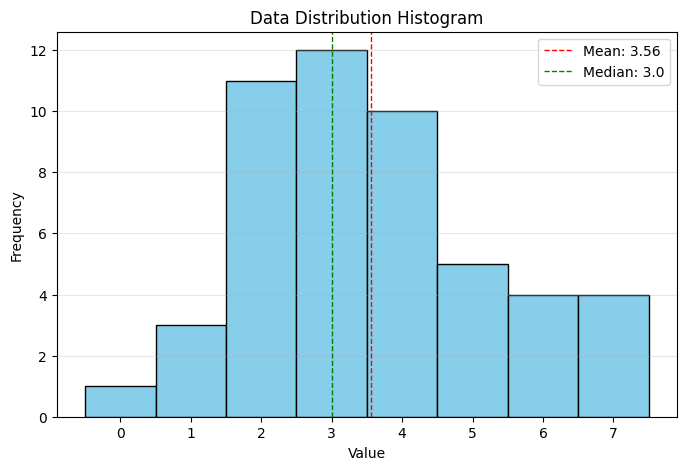

In [14]:
# ヒストグラム
# ヒストグラムの描画
plt.figure(figsize=(8, 5))
plt.hist(data, bins=range(min(data), max(data) + 2), color='skyblue', edgecolor='black', align='left')

# 統計情報の追加
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(data):.2f}')
plt.axvline(np.median(data), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(data):.1f}')

# ラベルとタイトルの設定
plt.title('Data Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(min(data), max(data) + 1))
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

In [16]:
# 標本分散 (nで割る)
var_sample = np.var(data) 
# 不偏標本分散 (n-1で割る: 推計統計で一般的)
var_unbiased = np.var(data, ddof=1)
# 標本標準偏差 (nで割る)
std_sample = np.std(data)
# 不偏標本標準偏差 (n-1で割る)
std_unbiased = np.std(data, ddof=1)

print(f"標本分散: {var_sample:.3f}")
print(f"不偏標本分散: {var_unbiased:.3f}")
print(f"標本標準偏差: {std_sample:.3f}")
print(f"不偏標本標準偏差: {std_unbiased:.3f}")

標本分散: 2.926
不偏標本分散: 2.986
標本標準偏差: 1.711
不偏標本標準偏差: 1.728


In [ ]:
# 2.2 データと確率分布の対応関係をながめる

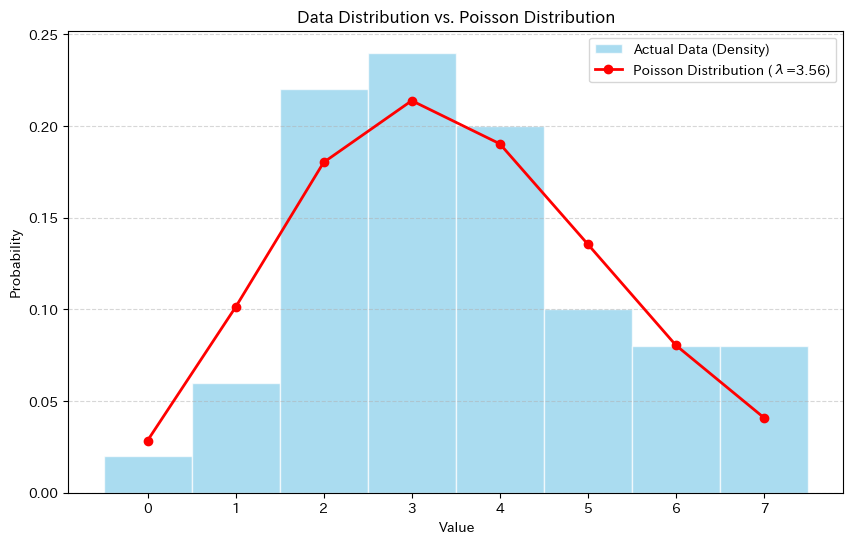

In [21]:
# データの平均 (λ)
mu = np.mean(data)

# プロット用のx軸（0からデータの最大値まで）
x = np.arange(0, np.max(data) + 1)

# ポアソン分布の理論値
poisson_pmf = poisson.pmf(x, mu)

plt.figure(figsize=(10, 6))

# 1. 実際のデータのヒストグラム（正規化）
plt.hist(data, bins=np.arange(9)-0.5, density=True, color='skyblue', 
         edgecolor='white', alpha=0.7, label='Actual Data (Density)')

# 2. ポアソン分布の折れ線グラフ
plt.plot(x, poisson_pmf, marker='o', linestyle='-', color='red', 
         linewidth=2, label=f'Poisson Distribution (λ={mu:.2f})')

# グラフの装飾
plt.title('Data Distribution vs. Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()